# Coursework

# Part1

## 1-3. Analyse dataset, fill NaN values

In [2]:
!pip install pandas

     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 61.2/61.2 kB 3.4 MB/s eta 0:00:00
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.4-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB 8.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/11.6 MB 7.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/11.6 MB 6.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/11.6 MB 7.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.6 MB 7.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.6 MB 6.6 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.6 MB 6.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.6 MB 6.5 MB/s eta 0:00:02
   --------- ----------


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Libraries for part2
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import sklearn.metrics as metrics
from mpl_toolkits.mplot3d import Axes3D

C:\Users\Admin\AppData\Local\Temp\ipykernel_12276\1643921480.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'seaborn'

In [2]:
df = pd.read_csv("heart_disease_uci.csv") 

In [3]:
df.drop(['id','dataset','num'], axis=1, inplace=True)

In [4]:
df.isnull().values.any()

True

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().values.any()

False

In [7]:
df = df.reset_index(drop=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,68,Male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect
295,57,Male,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect
296,57,Female,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal
297,47,Male,asymptomatic,150.0,226.0,False,normal,98.0,True,1.5,flat,0.0,reversable defect


## 4. Represent data in matrix form
green - max falues
red - min values

In [8]:
df_cut = df[:10][['trestbps', 'chol', 'oldpeak', 'age']]
df_cut.style.highlight_max(color='green').highlight_min(color='red') 

,trestbps,chol,oldpeak,age
0,145.000000,233.000000,2.300000,63
1,160.000000,286.000000,1.500000,67
2,120.000000,229.000000,2.600000,67
3,130.000000,250.000000,3.500000,37
4,130.000000,204.000000,1.400000,41
5,120.000000,236.000000,0.800000,56
6,140.000000,268.000000,3.600000,62
7,120.000000,354.000000,0.600000,57
8,130.000000,254.000000,1.400000,63
9,140.000000,203.000000,3.100000,53


### Mathematical expectation


In [9]:
df.mean(numeric_only=True)

age          54.521739
trestbps    131.715719
chol        246.785953
thalch      149.327759
oldpeak       1.058528
ca            0.672241
dtype: float64

### Dispersion

In [10]:
df.var(numeric_only=True) 

age           81.545667
trestbps     314.982672
chol        2759.672151
thalch       534.583489
oldpeak        1.352033
ca             0.878791
dtype: float64

### Normalization


In [11]:
numeric_cols = df.select_dtypes(include=np.number).columns.difference(['ca'])
normalized_df = df.copy()
normalized_df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())
normalized_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0.708333,Male,typical angina,0.481132,0.286638,True,lv hypertrophy,0.603053,False,0.370968,downsloping,0.0,fixed defect
1,0.791667,Male,asymptomatic,0.622642,0.400862,False,lv hypertrophy,0.282443,True,0.241935,flat,3.0,normal
2,0.791667,Male,asymptomatic,0.245283,0.278017,False,lv hypertrophy,0.442748,True,0.419355,flat,2.0,reversable defect
3,0.166667,Male,non-anginal,0.339623,0.323276,False,normal,0.885496,False,0.564516,downsloping,0.0,normal
4,0.250000,Female,atypical angina,0.339623,0.224138,False,lv hypertrophy,0.770992,False,0.225806,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.812500,Male,asymptomatic,0.471698,0.200431,True,normal,0.534351,False,0.548387,flat,2.0,reversable defect
295,0.583333,Male,asymptomatic,0.339623,0.066810,False,normal,0.335878,True,0.193548,flat,1.0,reversable defect
296,0.583333,Female,atypical angina,0.339623,0.293103,False,lv hypertrophy,0.786260,False,0.000000,flat,1.0,normal
297,0.375000,Male,asymptomatic,0.528302,0.271552,False,normal,0.206107,True,0.241935,flat,0.0,reversable defect


## 5. Visualize data

### Line Plot 

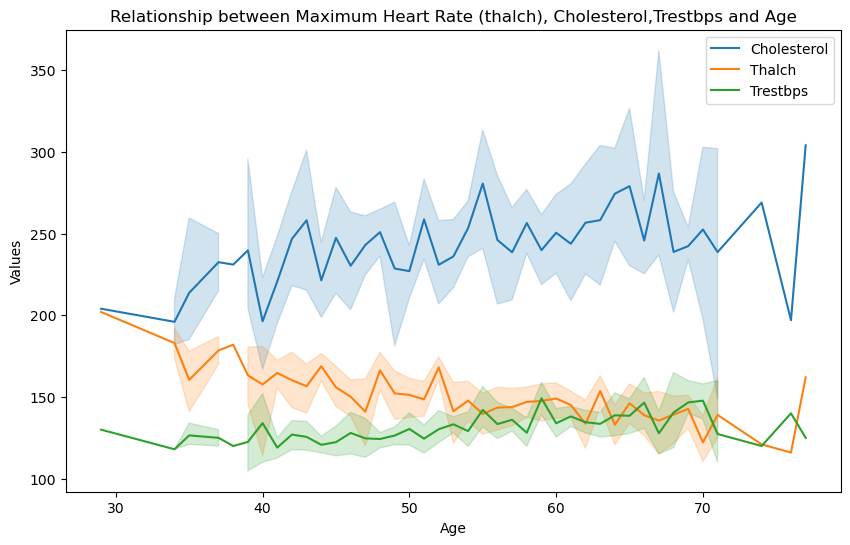

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="age", y="chol", label="Cholesterol")
sns.lineplot(data=df, x="age", y="thalch", label="Thalch")
sns.lineplot(data=df, x="age", y="trestbps", label="Trestbps")

plt.xlabel("Age")
plt.ylabel("Values")
plt.title("Relationship between Maximum Heart Rate (thalch), Cholesterol,Trestbps and Age")

plt.show()

- age VS tchalch: негативна залежність, зі збільшення віку слідує зменшення максимальної серцевої частоти

- age VS cholesterol,trestbps: позитивна залежність, зі збільшення віку слідує збільшення нормального артеріального тиску та холестеролу

###  Bar Chart

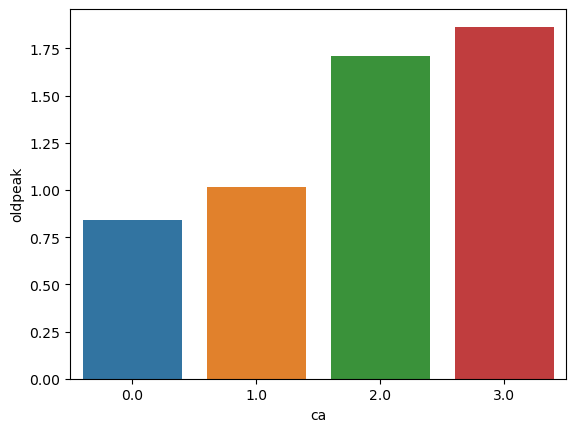

In [13]:
sns.barplot(y='oldpeak', x='ca', data=df, ci=None)
plt.show()

- Бачимо явну кореляцію між ca і oldpeak. Чим більша кількість основних судин, тим більший ступінь депресії сегмента ST після фізичного навантаження

## Histogram

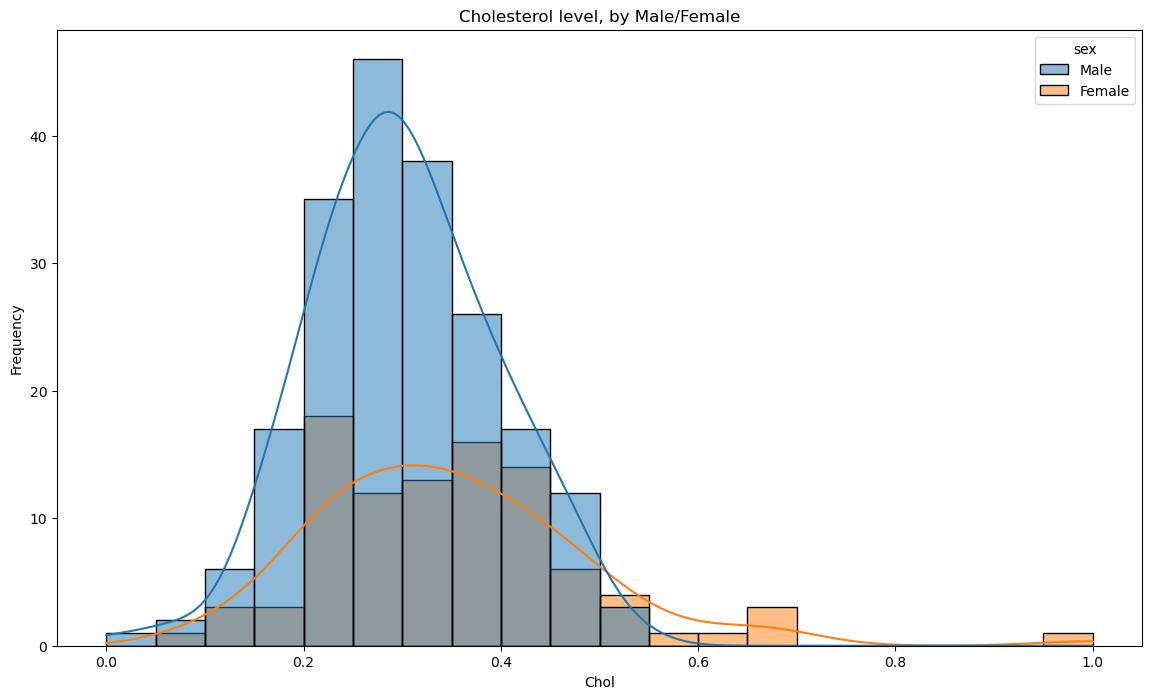

In [14]:
plt.figure(figsize=(14, 8))
sns.histplot(data=normalized_df, x='chol', hue='sex', kde=True, bins=20)
plt.title('Cholesterol level, by Male/Female')
plt.xlabel('Chol')
plt.ylabel('Frequency')
plt.show()

In [15]:
total_rows = len(df)
male_count = df[df['sex'] == 'Male'].shape[0]
percentage_male = (male_count / total_rows) * 100
print(f"The percentage of data with 'Male': {percentage_male:.2f}%")

The percentage of data with 'Male': 67.89%


- По графіку бачимо, що частіше проблеми з рівнем холестерину в крові є у чоловіків, що збігається з науковими фактами. АЛЕ 68% наших даних стосуються чоловіків, тому по факту різниця не така вилика, як показано на графіку

## Heatmap

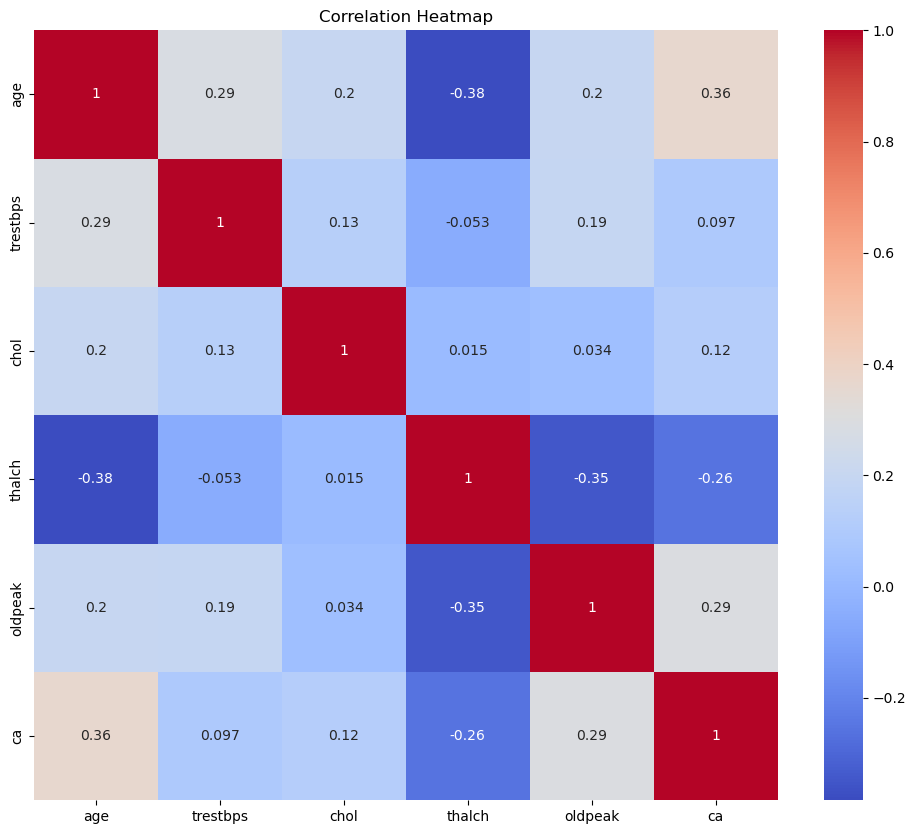

In [16]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.title('Correlation Heatmap')
plt.show()

- Hitmap візуалізє відношення між різними величинами за допомогою кольорів.

- Холодний колір - негативна кореляція (бачимо це наприкладі thalch & oldpeak)

- Теплий колір - позитивна ( age & trestbps )

- Чим "сильніший" колір, тим більша кореляція

## 6. Plot for 4 variables

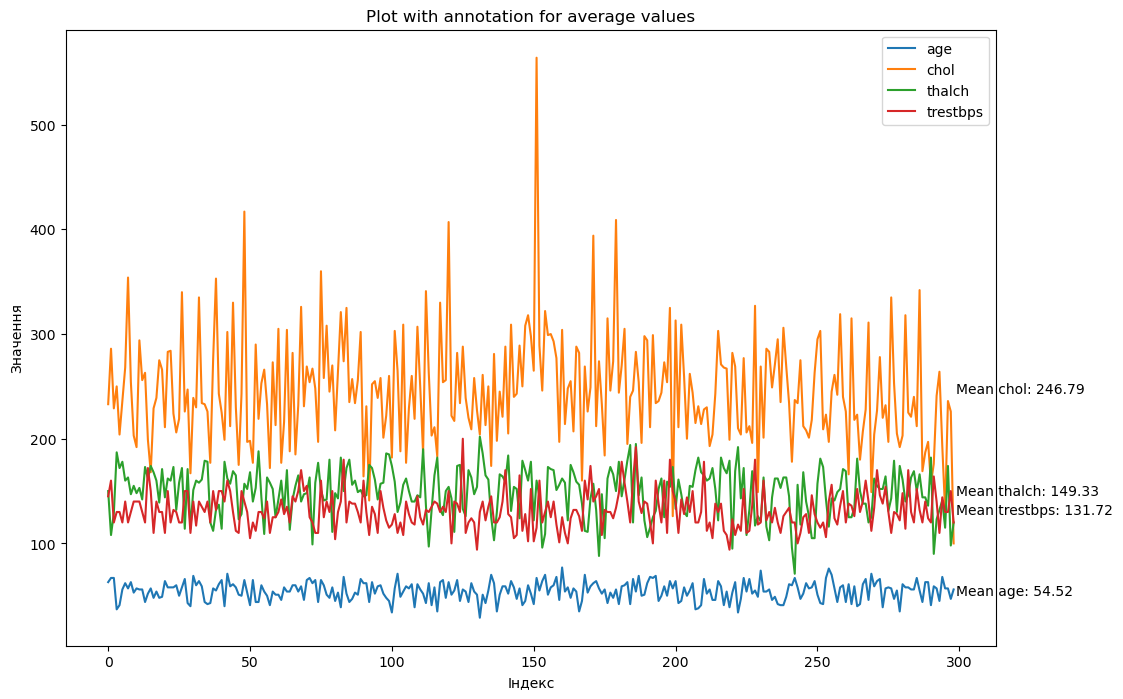

In [17]:
columns_to_plot = ['age', 'chol', 'thalch', 'trestbps']
plt.figure(figsize=(12, 8))

for column in columns_to_plot:
    sns.lineplot(x=df.index, y=column, label=column, data=df)
    mean_value = df[column].mean()
    plt.text(df.index.max() + 1, mean_value, f'Mean {column}: {mean_value:.2f}', color='black', ha='left', va='center')

plt.title('Plot with annotation for average values')
plt.xlabel('Індекс')
plt.ylabel('Значення')
plt.show()

## 9. lineplots

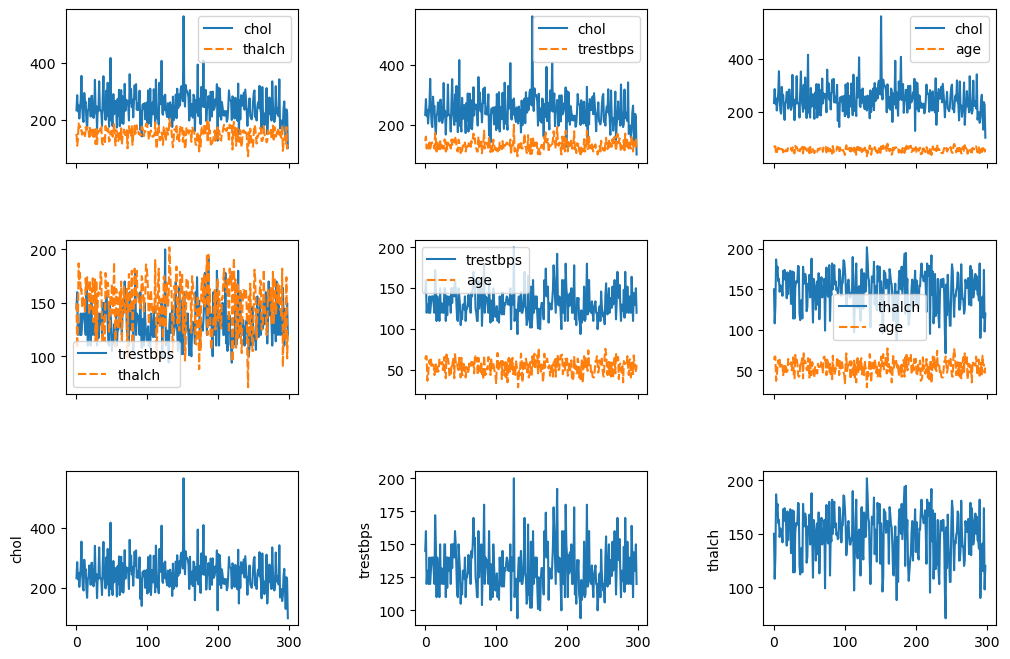

In [18]:
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(12, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)  

sns.lineplot(ax=axes[0, 0], data=df[['chol', 'thalch']])
sns.lineplot(ax=axes[0, 1], data=df[['chol', 'trestbps']])
sns.lineplot(ax=axes[0, 2], data=df[['chol', 'age']])

sns.lineplot(ax=axes[1, 0], data=df[['trestbps', 'thalch']])
sns.lineplot(ax=axes[1, 1], data=df[['trestbps', 'age']])
sns.lineplot(ax=axes[1, 2], data=df[['thalch', 'age']])

sns.lineplot(ax=axes[2, 0], data=df['chol'])
sns.lineplot(ax=axes[2, 1], data=df['trestbps'])
sns.lineplot(ax=axes[2, 2], data=df['thalch'])

plt.show()

## 7. Pearson Coefficient

In [19]:
df['age'] = df['age'].astype('float64') 
numeric_df = df.select_dtypes(include=['float64'])
numeric_df = numeric_df.drop(columns=['ca'])

correlation_matrix = numeric_df.corr(method='pearson')
correlation_matrix

,age,trestbps,chol,thalch,oldpeak
age,1.000000,0.286149,0.199258,-0.384176,0.195929
trestbps,0.286149,1.000000,0.134240,-0.053320,0.191144
chol,0.199258,0.134240,1.000000,0.014894,0.033964
thalch,-0.384176,-0.053320,0.014894,1.000000,-0.348089
oldpeak,0.195929,0.191144,0.033964,-0.348089,1.000000


- Чим більший коефіцієнт (по модулю), тим вища кореляція між нашими величинами
- Бачимо, що найбільшою є кореляція між thalch та oldpeak

###  Relplot for variables with the biggest correlation

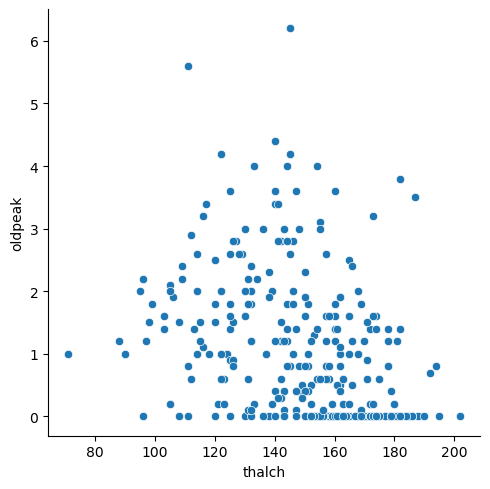

In [20]:
sns.relplot(data=df, x='thalch', y='oldpeak', kind='scatter')

## 8. Remove random values ​​from the features that have the highest correlation in the amount of 10% for both. Calculate the correlation. Build a multiple scatterplot taking the third feature as the x-axis

In [21]:
normalized_df.corr(numeric_only=True)

,age,trestbps,chol,thalch,oldpeak,ca
age,1.000000,0.286149,0.199258,-0.384176,0.195929,0.362764
trestbps,0.286149,1.000000,0.134240,-0.053320,0.191144,0.096641
chol,0.199258,0.134240,1.000000,0.014894,0.033964,0.121907
thalch,-0.384176,-0.053320,0.014894,1.000000,-0.348089,-0.256831
oldpeak,0.195929,0.191144,0.033964,-0.348089,1.000000,0.291958
ca,0.362764,0.096641,0.121907,-0.256831,0.291958,1.000000


<Figure size 1000x1000 with 0 Axes>

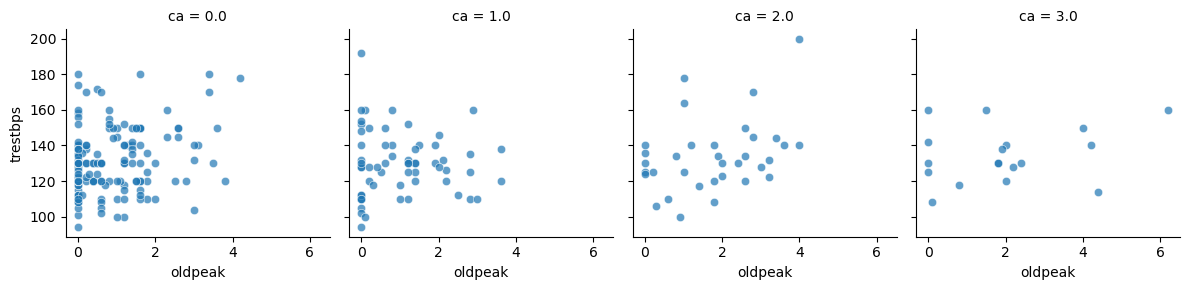

In [22]:
np.random.seed(47)
remove_n = int(df.shape[0]*0.1)
drop_indices = np.random.choice(df.index, remove_n, replace =False)
df.subset = df.drop(drop_indices)

plt.figure(figsize=(10,10))
g=sns.FacetGrid(df.subset, col='ca')
g.map(sns.scatterplot,'oldpeak','trestbps', alpha=.7)
plt.show()

# PART2

### 1. Regression models 

In [23]:
X = np.array(normalized_df['thalch']).reshape(-1, 1) 
Y = np.array(normalized_df['oldpeak']).reshape(-1, 1)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

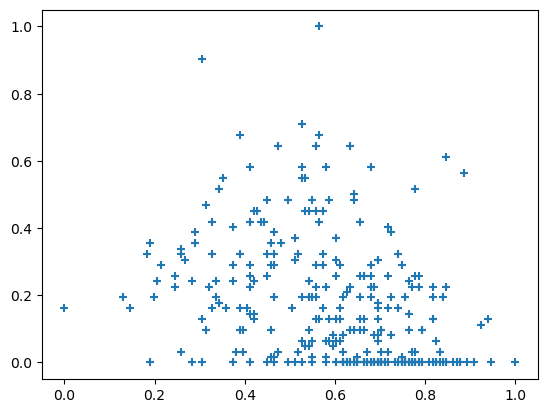

In [25]:
plt.scatter(X, Y, marker='+') 

### a) Linear regression

In [26]:
lin_model = LinearRegression().fit(X_train, Y_train)
Y_pred = lin_model.predict(X_test)

### b) Random Forest

In [27]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=3).fit(X_train, Y_train)
Y1_pred = rf_model.predict(X_test)

### c) Multi Layer Perceptron Regression

In [28]:
mlp_model = MLPRegressor(random_state=1, max_iter=500).fit(X_train, Y_train.ravel())
Y2_pred = mlp_model.predict(X_test)

## 2. Evaluation Metrics

In [29]:
mae = metrics.mean_absolute_error(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
medae = metrics.median_absolute_error(Y_test, Y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Median Absolute Error:', medae)

Mean Absolute Error: 0.13397807700978717
Mean Squared Error: 0.034764675277011776
Median Absolute Error: 0.10657795473938116


In [30]:
mae = metrics.mean_absolute_error(Y_test, Y1_pred)
mse = metrics.mean_squared_error(Y_test, Y1_pred)
medae = metrics.median_absolute_error(Y_test, Y1_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Median Absolute Error:', medae)

Mean Absolute Error: 0.13176552119108428
Mean Squared Error: 0.03250333800014991
Median Absolute Error: 0.09370066106620742


In [31]:
mae = metrics.mean_absolute_error(Y_test, Y2_pred)
mse = metrics.mean_squared_error(Y_test, Y2_pred)
medae = metrics.median_absolute_error(Y_test, Y2_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Median Absolute Error:', medae)

Mean Absolute Error: 0.1401053018310648
Mean Squared Error: 0.035763421589983226
Median Absolute Error: 0.12760973567583564


- Менші значення вказують на більшу точність

- Відповідно, в даному випадку, по всім парамерам найточнішою є random forest

## 4. Visualize regressions

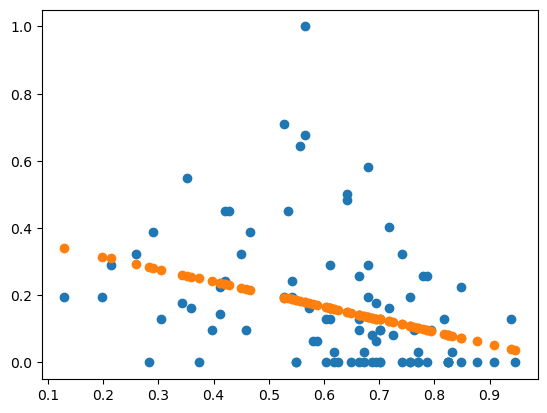

In [32]:
plt.scatter(X_test, Y_test) # linear regression
plt.scatter(X_test, Y_pred)

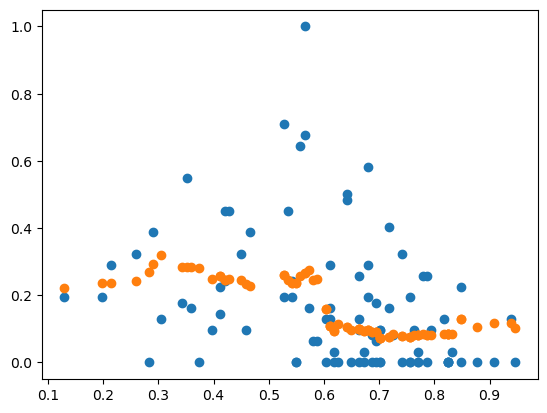

In [33]:
plt.scatter(X_test, Y_test) # Random Forest regression
plt.scatter(X_test, Y1_pred)

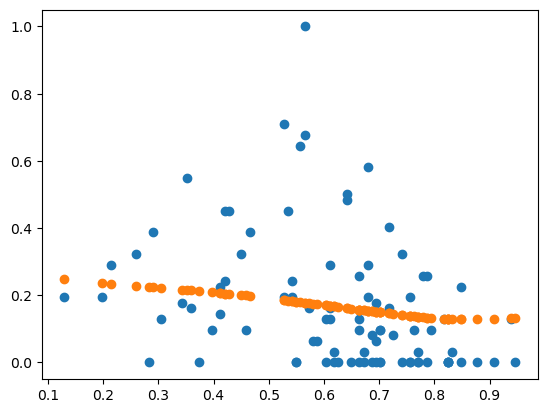

In [34]:
plt.scatter(X_test, Y_test) # MLP regression
plt.scatter(X_test, Y2_pred)

## 5. Square the feature used as a predictor for the regression model and use its squared feature as the second feature

In [35]:
X_squared = X ** 2
X_extended = np.concatenate((X, X_squared), axis=1)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_extended, Y, test_size=0.3, random_state=42)
lin_model1 = LinearRegression().fit(X1_train, Y1_train)
Y1_pred = lin_model1.predict(X1_test)  


mse = metrics.mean_squared_error(Y1_test, Y1_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0339562163159364


## 6. Test a set of regression models with two predictors. Plot accuracies and graphs for both features. Compare on the graphs the results of forecasting with one and two signs, taking x as the initial sign

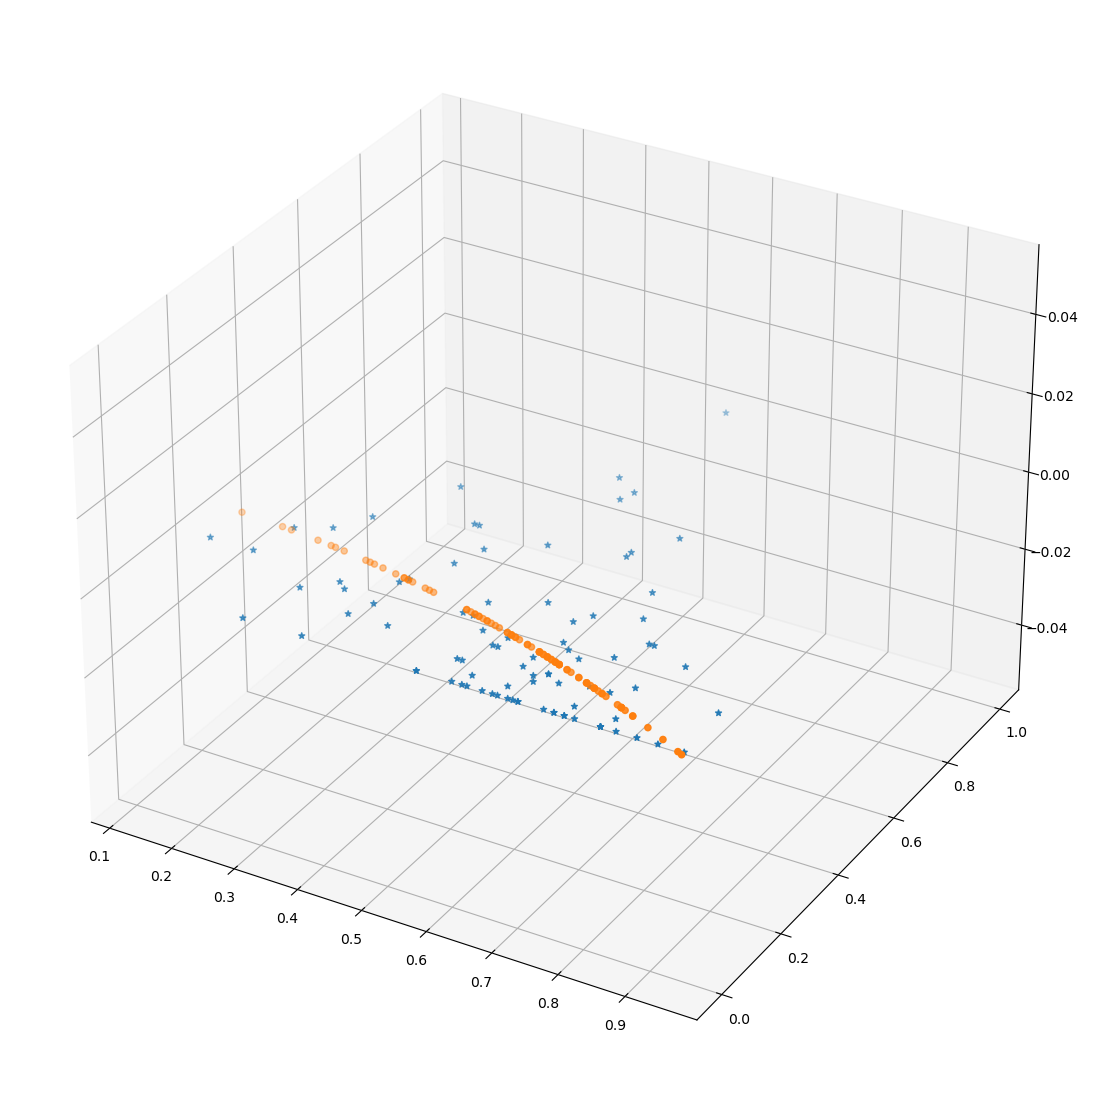

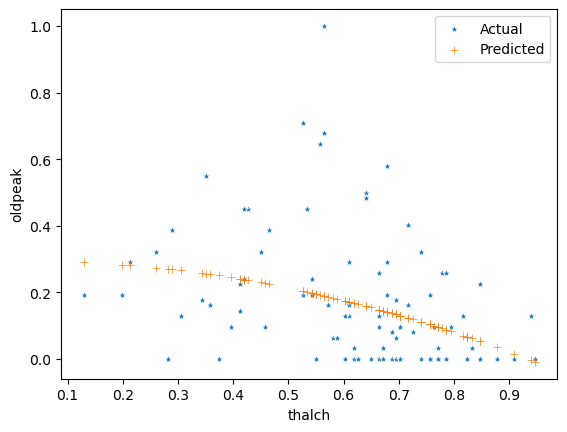

R-squared: 0.12893282519200766
Mean Absolute Error: 0.13236466710041944


In [36]:
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test[:, 0], Y_test, marker="*")  # Use the existing column
ax.scatter(X1_test[:, 0], Y1_pred, marker="o")  # Use the existing column
plt.show()

r2 = metrics.r2_score(Y1_test, Y1_pred)
mae = metrics.mean_absolute_error(Y1_test, Y1_pred)


sns.scatterplot(x=X1_test[:, 0], y=Y1_test.flatten(), label='Actual', marker="*")
sns.scatterplot(x=X1_test[:, 0], y=Y1_pred.flatten(), label='Predicted', marker="+")
plt.xlabel('thalch')
plt.ylabel('oldpeak')
plt.legend()
plt.show()

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")